In [1]:
import pandas as pd

%load_ext autoreload
%autoreload 2

folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
csv_folder = '{}/csvs_for_paper'.format(folder)
bed_folder = '{}/bed'.format(folder)


splicing_feature_folder = '{}/splicing_feature_data'.format(csv_folder)
alternative_feature_folder = '{}/alternative'.format(splicing_feature_folder)
constitutive_feature_folder = '{}/constitutive'.format(splicing_feature_folder)

alt_exons_bedfile = '{}/exons.bed'.format(alternative_feature_folder)
constitutive_bedfile = '{}/exons.bed'.format(constitutive_feature_folder)

bedfiles = alt_exons_bedfile, constitutive_bedfile

# splicing_feature_data = pd.read_csv('{}/splicing_feature_data.csv'.format(csv_folder), index_col=0)
# print(splicing_feature_data.shape)
# splicing_feature_data.head()

In [2]:
import pybedtools
constitutive_bed = pybedtools.BedTool(constitutive_bedfile)
names = [x.name for x in constitutive_bed]

constitutive_feature_data = pd.DataFrame(index=names)

In [3]:
len(constitutive_bed)

17541

In [4]:
hg19_fasta = '/projects/ps-yeolab/genomes/hg19/gencode/v19/GRCh37.p13.genome.fa'

## Splice site strength

In [5]:
chromsizes = '/projects/ps-yeolab/genomes/hg19/hg19.chrom.sizes'

In [6]:
import poshsplice.splicestrength

In [8]:
! head $constitutive_bedfile

chr10	101162337	101162479	exon:chr10:101162337-101162479:-	1000	-
chr10	101163226	101163391	exon:chr10:101163226-101163391:-	1000	-
chr10	101165513	101165617	exon:chr10:101165513-101165617:-	1000	-
chr10	101165894	101166006	exon:chr10:101165894-101166006:-	1000	-
chr10	101166483	101166606	exon:chr10:101166483-101166606:-	1000	-
chr10	101180381	101180562	exon:chr10:101180381-101180562:-	1000	-
chr10	101480744	101480825	exon:chr10:101480744-101480825:-	1000	-
chr10	101483713	101483880	exon:chr10:101483713-101483880:-	1000	-
chr10	101486725	101486911	exon:chr10:101486725-101486911:-	1000	-
chr10	101487198	101487320	exon:chr10:101487198-101487320:-	1000	-


In [10]:
poshsplice.splicestrength??

In [23]:
from poshsplice.splicestrength import score_exons

constitutive_scores = score_exons(constitutive_bedfile, fasta=hg19_fasta, genome='hg19')
constitutive_scores.head(10)

+
-
+
-


,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq
exon:chr10:101162337-101162479:-,6.29,CGTCACTGTCCATGCTTCAGGAC,10.43,ACCGTAAGT
exon:chr10:101163226-101163391:-,9.48,ATTCTGGTCCCTCTCTTTAGATG,9.33,ATGGTAAGG
exon:chr10:101165513-101165617:-,7.94,CATAGCTTCCTTCTCCTCAGAAT,9.01,AAGGTAACT
exon:chr10:101165894-101166006:-,7.97,TTTTACTTCTTTGCATGCAGAGA,7.07,GAGGTGGGT
exon:chr10:101166483-101166606:-,13.81,CCCTGTTTCTTCTCTTTCAGGTA,7.93,GGGGTGAGT
exon:chr10:101180381-101180562:-,6.65,AACTCTTTTCCATTCTCCAGCAT,10.75,CGGGTAAGT
exon:chr10:101480744-101480825:-,8.06,TGATTTTTTTTCATATTTAGTTG,9.79,CAGGTAGGA
exon:chr10:101483713-101483880:-,5.75,TCATCTCTTGGGGGTTCTAGGGT,10.57,AAGGTAAGA
exon:chr10:101486725-101486911:-,5.29,TGACTTTCCATTTCACCCAGCTT,10.77,CAGGTAAGA
exon:chr10:101487198-101487320:-,8.05,AATTTCTTTCCTATCCTAAGGTT,8.62,AATGTAAGT


In [16]:
len(ss_seqs)

17541

In [19]:
lengths = pd.Series([len(x) for x in ss_seqs])
(lengths != 23).sum()

1

In [20]:
lengths[lengths != 23]

15202    21
dtype: int64

In [22]:
names = [x.name for x in bed]
names[15202]

u'novel_exon:chr13:31714446-31714446:-'

In [27]:
bed_lengths = pd.Series([len(x) for x in bed])
bed_lengths[bed_lengths <= 1]

16823    1
dtype: int64

In [28]:
constitutive_scores.shape

(17540, 4)

In [29]:
import seaborn as sns

%matplotlib inline

In [39]:
figure_folder = 'figures/018_calculate_splice_site_strength'
! mkdir -p $figure_folder

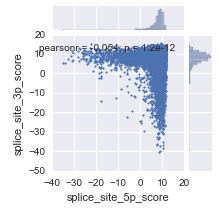

In [40]:
g = sns.jointplot('splice_site_5p_score', 'splice_site_3p_score', 
                  constitutive_scores, joint_kws=dict(rasterized=True, s=3), size=3)
g.savefig('{}/constitutive_5p_vs_3p_scores.pdf'.format(figure_folder), dpi=300)

In [41]:
constitutive_scores.shape

(17540, 4)

In [42]:
ls $csv_folder/constitutive*

/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/constitutive_downstream400_pyrimidine_content.csv
/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/constitutive_exons.bed
/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/constitutive_feature_data.csv
/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/constitutive_upstream400_pyrimidine_content.csv


### Write constitutive data

In [43]:
constitutive_scores.to_csv('{}/maxentscan.csv'.format(constitutive_feature_folder))

## Alternative scores

In [44]:
! ls -lha $alt_exons_bedfile

-rw-r--r-- 1 obotvinnik yeo-group 6.8M Jan  5 12:37 /projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/splicing_feature_data/alternative/exons.bed


In [45]:
%pdb

Automatic pdb calling has been turned ON


In [47]:
# alt_bed = pybedtools

In [48]:
from poshsplice.splicestrength import score_exons

alt_exons_scores = score_exons(alt_exons_bedfile, genome='hg19', fasta=hg19_fasta)
alt_exons_scores.head()

+
-
+
-


,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq
isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT
isoform1=junction:chr10:100190428-100193696:-|isoform2=junction:chr10:100191049-100193696:-@exon:chr10:100190888-100191048:-@junction:chr10:100190428-100190887:-,9.08,TCCCTTCCTGCCCTGGCTAGGCC,7.96,TAGGTGAGC
isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@exon:chr10:100195029-100195171:-@junction:chr10:100193849-100195028:-,7.92,TGGCCTGCCTGTGCCTGCAGTTT,6.05,GGAGTGAGT
isoform1=junction:chr10:101163392-101165512:-|isoform2=junction:chr10:101163632-101165512:-@exon:chr10:101163481-101163631:-@junction:chr10:101163392-101163480:-,10.79,CTCACTTTGCTTCCCCGCAGCAC,8.34,ACAGTGAGT
isoform1=junction:chr10:101191023-101193302:+|isoform2=junction:chr10:101191023-101191686:+@novel_exon:chr10:101191687-101191705:+@junction:chr10:101191706-101193302:+,11.50,TTTTTTTACTTTTATTTTAGGTT,7.44,CAGGTTTGT


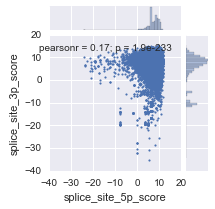

In [51]:
g = sns.jointplot('splice_site_5p_score', 'splice_site_3p_score', 
                  alt_exons_scores, joint_kws=dict(rasterized=True, s=3), size=3)
g.ax_joint.set(xlim=(-40, 20), ylim=(-40, 20))
g.savefig('{}/alternative_5p_vs_3p_scores.pdf'.format(figure_folder), dpi=300)

In [52]:
! wc -l $alt_exons_bedfile

34979 /projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/splicing_feature_data/alternative/exons.bed


In [53]:
alt_exons_scores.shape

(34979, 4)

In [54]:
alt_exons_scores.to_csv('{}/maxentscan.csv'.format(alternative_feature_folder))

##  Compare alt and constitutve

In [55]:
alt_exons_scores['exon_type'] = 'alternative'
constitutive_scores['exon_type'] = 'constitutive'


splice_site_scores = pd.concat([alt_exons_scores, constitutive_scores])
splice_site_scores.head()

,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq,exon_type
isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT,alternative
isoform1=junction:chr10:100190428-100193696:-|isoform2=junction:chr10:100191049-100193696:-@exon:chr10:100190888-100191048:-@junction:chr10:100190428-100190887:-,9.08,TCCCTTCCTGCCCTGGCTAGGCC,7.96,TAGGTGAGC,alternative
isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@exon:chr10:100195029-100195171:-@junction:chr10:100193849-100195028:-,7.92,TGGCCTGCCTGTGCCTGCAGTTT,6.05,GGAGTGAGT,alternative
isoform1=junction:chr10:101163392-101165512:-|isoform2=junction:chr10:101163632-101165512:-@exon:chr10:101163481-101163631:-@junction:chr10:101163392-101163480:-,10.79,CTCACTTTGCTTCCCCGCAGCAC,8.34,ACAGTGAGT,alternative
isoform1=junction:chr10:101191023-101193302:+|isoform2=junction:chr10:101191023-101191686:+@novel_exon:chr10:101191687-101191705:+@junction:chr10:101191706-101193302:+,11.50,TTTTTTTACTTTTATTTTAGGTT,7.44,CAGGTTTGT,alternative


In [56]:
splice_site_scores = splice_site_scores.rename(columns={'index': 'event_name'})
splice_site_scores.head()

,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq,exon_type
isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT,alternative
isoform1=junction:chr10:100190428-100193696:-|isoform2=junction:chr10:100191049-100193696:-@exon:chr10:100190888-100191048:-@junction:chr10:100190428-100190887:-,9.08,TCCCTTCCTGCCCTGGCTAGGCC,7.96,TAGGTGAGC,alternative
isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@exon:chr10:100195029-100195171:-@junction:chr10:100193849-100195028:-,7.92,TGGCCTGCCTGTGCCTGCAGTTT,6.05,GGAGTGAGT,alternative
isoform1=junction:chr10:101163392-101165512:-|isoform2=junction:chr10:101163632-101165512:-@exon:chr10:101163481-101163631:-@junction:chr10:101163392-101163480:-,10.79,CTCACTTTGCTTCCCCGCAGCAC,8.34,ACAGTGAGT,alternative
isoform1=junction:chr10:101191023-101193302:+|isoform2=junction:chr10:101191023-101191686:+@novel_exon:chr10:101191687-101191705:+@junction:chr10:101191706-101193302:+,11.50,TTTTTTTACTTTTATTTTAGGTT,7.44,CAGGTTTGT,alternative


In [57]:
three_prime = splice_site_scores[['splice_site_3p_score', 'splice_site_3p_seq', 'exon_type']]
three_prime = three_prime.rename(columns={'splice_site_3p_score': 'score', 'splice_site_3p_seq': 'seq'})
three_prime['splice_site'] = "3'"
three_prime.head()

,score,seq,exon_type,splice_site
isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,7.77,CTCTCCCCTGCCCTGCACAGCCT,alternative,3'
isoform1=junction:chr10:100190428-100193696:-|isoform2=junction:chr10:100191049-100193696:-@exon:chr10:100190888-100191048:-@junction:chr10:100190428-100190887:-,9.08,TCCCTTCCTGCCCTGGCTAGGCC,alternative,3'
isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@exon:chr10:100195029-100195171:-@junction:chr10:100193849-100195028:-,7.92,TGGCCTGCCTGTGCCTGCAGTTT,alternative,3'
isoform1=junction:chr10:101163392-101165512:-|isoform2=junction:chr10:101163632-101165512:-@exon:chr10:101163481-101163631:-@junction:chr10:101163392-101163480:-,10.79,CTCACTTTGCTTCCCCGCAGCAC,alternative,3'
isoform1=junction:chr10:101191023-101193302:+|isoform2=junction:chr10:101191023-101191686:+@novel_exon:chr10:101191687-101191705:+@junction:chr10:101191706-101193302:+,11.50,TTTTTTTACTTTTATTTTAGGTT,alternative,3'


In [58]:
five_prime = splice_site_scores[['splice_site_5p_score', 'splice_site_5p_seq', 'exon_type']]
five_prime = five_prime.rename(columns={'splice_site_5p_score': 'score', 'splice_site_5p_seq': 'seq'})
five_prime['splice_site'] = "5'"
five_prime.head()

,score,seq,exon_type,splice_site
isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,6.96,ACGGTGTGT,alternative,5'
isoform1=junction:chr10:100190428-100193696:-|isoform2=junction:chr10:100191049-100193696:-@exon:chr10:100190888-100191048:-@junction:chr10:100190428-100190887:-,7.96,TAGGTGAGC,alternative,5'
isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@exon:chr10:100195029-100195171:-@junction:chr10:100193849-100195028:-,6.05,GGAGTGAGT,alternative,5'
isoform1=junction:chr10:101163392-101165512:-|isoform2=junction:chr10:101163632-101165512:-@exon:chr10:101163481-101163631:-@junction:chr10:101163392-101163480:-,8.34,ACAGTGAGT,alternative,5'
isoform1=junction:chr10:101191023-101193302:+|isoform2=junction:chr10:101191023-101191686:+@novel_exon:chr10:101191687-101191705:+@junction:chr10:101191706-101193302:+,7.44,CAGGTTTGT,alternative,5'


In [59]:
splice_site_scores_tidy = pd.concat([five_prime.reset_index(), three_prime.reset_index()], ignore_index=True)
splice_site_scores_tidy.head()

,index,score,seq,exon_type,splice_site
0,isoform1=junction:chr10:100189400-100190327:-|...,6.96,ACGGTGTGT,alternative,5'
1,isoform1=junction:chr10:100190428-100193696:-|...,7.96,TAGGTGAGC,alternative,5'
2,isoform1=junction:chr10:100193849-100195391:-|...,6.05,GGAGTGAGT,alternative,5'
3,isoform1=junction:chr10:101163392-101165512:-|...,8.34,ACAGTGAGT,alternative,5'
4,isoform1=junction:chr10:101191023-101193302:+|...,7.44,CAGGTTTGT,alternative,5'


In [60]:
splice_site_scores

,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq,exon_type
isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT,alternative
isoform1=junction:chr10:100190428-100193696:-|isoform2=junction:chr10:100191049-100193696:-@exon:chr10:100190888-100191048:-@junction:chr10:100190428-100190887:-,9.08,TCCCTTCCTGCCCTGGCTAGGCC,7.96,TAGGTGAGC,alternative
isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@exon:chr10:100195029-100195171:-@junction:chr10:100193849-100195028:-,7.92,TGGCCTGCCTGTGCCTGCAGTTT,6.05,GGAGTGAGT,alternative
isoform1=junction:chr10:101163392-101165512:-|isoform2=junction:chr10:101163632-101165512:-@exon:chr10:101163481-101163631:-@junction:chr10:101163392-101163480:-,10.79,CTCACTTTGCTTCCCCGCAGCAC,8.34,ACAGTGAGT,alternative
isoform1=junction:chr10:101191023-101193302:+|isoform2=junction:chr10:101191023-101191686:+@novel_exon:chr10:101191687-101191705:+@junction:chr10:101191706-101193302:+,11.50,TTTTTTTACTTTTATTTTAGGTT,7.44,CAGGTTTGT,alternative
isoform1=junction:chr10:101419346-101421202:+|isoform2=junction:chr10:101419346-101419618:+@exon:chr10:101419619-101419721:+@junction:chr10:101419722-101421202:+,5.04,CTGAAATCAAATCTTTCTAGGCT,9.31,TAGGTAAGG,alternative
isoform1=junction:chr10:101421386-101439481:+|isoform2=junction:chr10:101421386-101439017:+@exon:chr10:101439018-101439223:+@junction:chr10:101439224-101439481:+,8.79,TCTCTTTTTGCCTGACTTAGGTA,7.64,CAGGTACTA,alternative
isoform1=junction:chr10:101476219-101480743:-|isoform2=junction:chr10:101478258-101480743:-@exon:chr10:101478103-101478257:-@junction:chr10:101476219-101478102:-,2.71,CCATTTACCTTGGAATACAGGGG,10.65,CTGGTAAGT,alternative
isoform1=junction:chr10:101507148-101514285:+|isoform2=junction:chr10:101507148-101510125:+@exon:chr10:101510126-101510153:+@junction:chr10:101510154-101514285:+,12.11,TTTTTTTTTTCTTTTTTCAGGCA,7.51,CAGGTATTT,alternative
isoform1=junction:chr10:101507148-101515381:+|isoform2=junction:chr10:101507148-101514285:+@exon:chr10:101514286-101514391:+@junction:chr10:101514392-101515381:+,8.25,TTACTTATTCTTTGCAACAGGAG,5.48,TCGGTAAAA,alternative


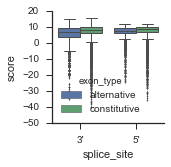

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', context='notebook')

%matplotlib inline

fig, ax = plt.subplots(figsize=(2, 2))
sns.boxplot(hue='exon_type', y='score', data=splice_site_scores_tidy, x='splice_site', 
            linewidth=1, fliersize=2, order=["3'", "5'"])
sns.despine()
fig.savefig('{}/splice_site_scores_boxplots.pdf'.format(figure_folder))

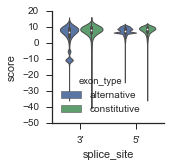

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', context='notebook')

%matplotlib inline

fig, ax = plt.subplots(figsize=(2, 2))
sns.violinplot(hue='exon_type', y='score', data=splice_site_scores_tidy, x='splice_site', 
            linewidth=1, order=["3'", "5'"], cut=True)
sns.despine()
fig.savefig('{}/splice_site_scores_violinplots.pdf'.format(figure_folder))